In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2957.390756302521
RMSE =  6003.590915289887


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  461.57142857142856
RMSE =  988.4787905300402


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f1 = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
    ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  12406.538461538461
RMSE =  14334.41695844172
-- World performances for deaths --
MAPE =  1909.7692307692307
RMSE =  2429.075227640853


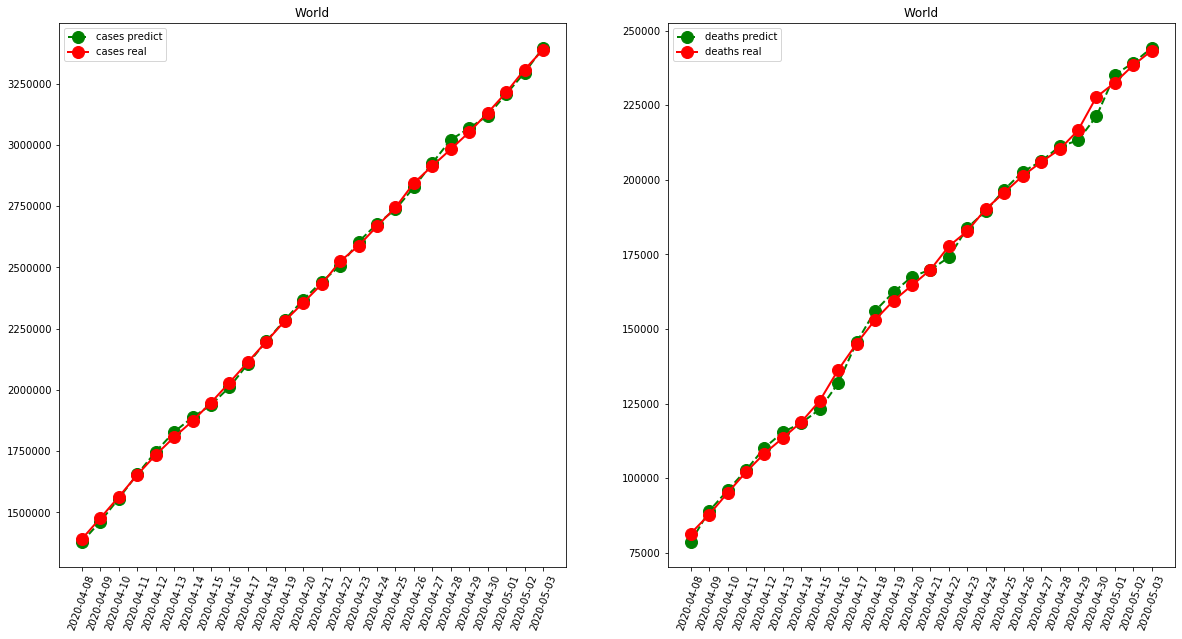

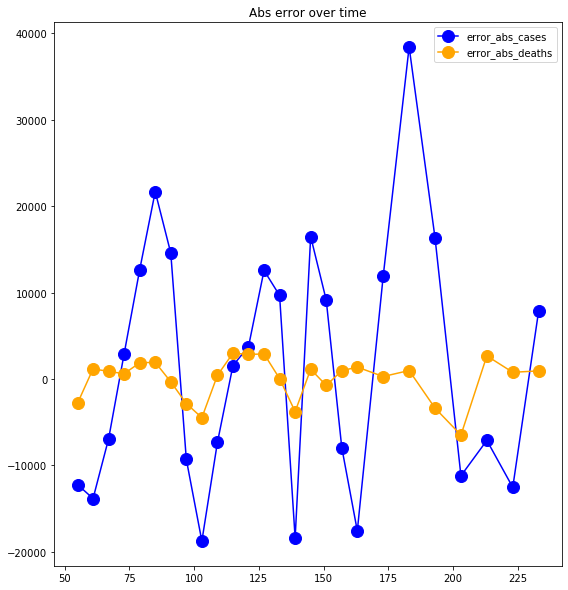

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  1542.111111111111
RMSE =  2137.0378642722576
-- France performances for deaths --
MAPE =  374.3611111111111
RMSE =  538.0727181338968


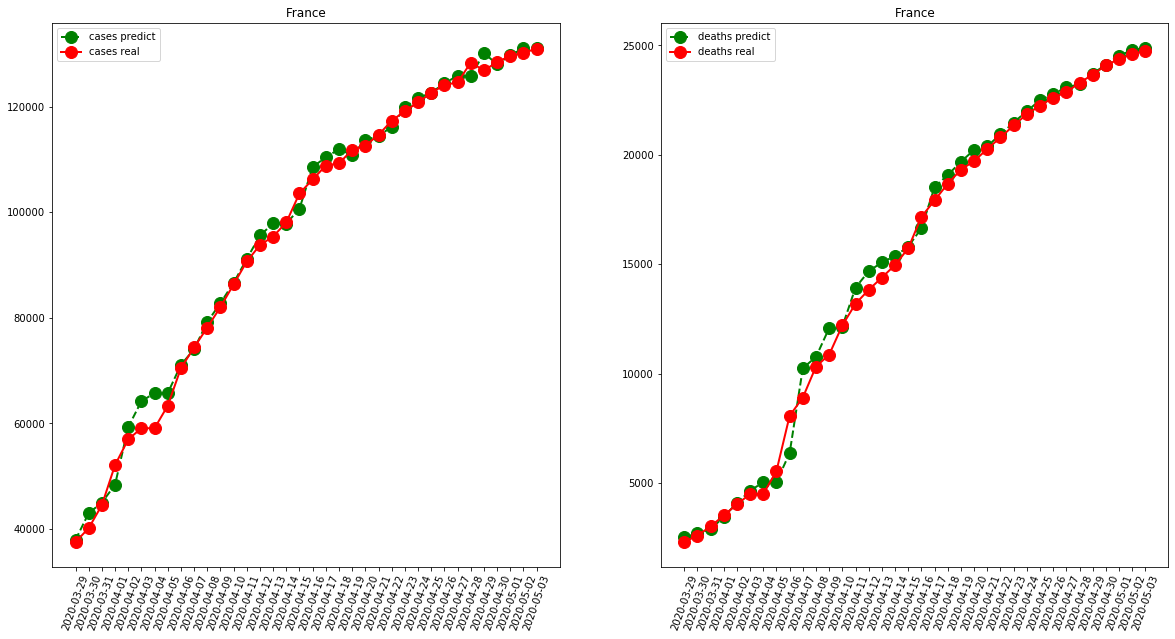

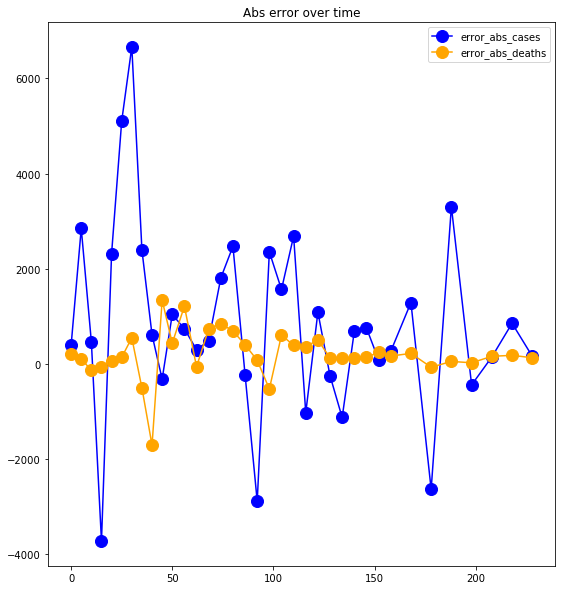

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  644.9722222222222
RMSE =  830.9184175757971
-- Italy performances for deaths --
MAPE =  83.63888888888889
RMSE =  110.64520374201093


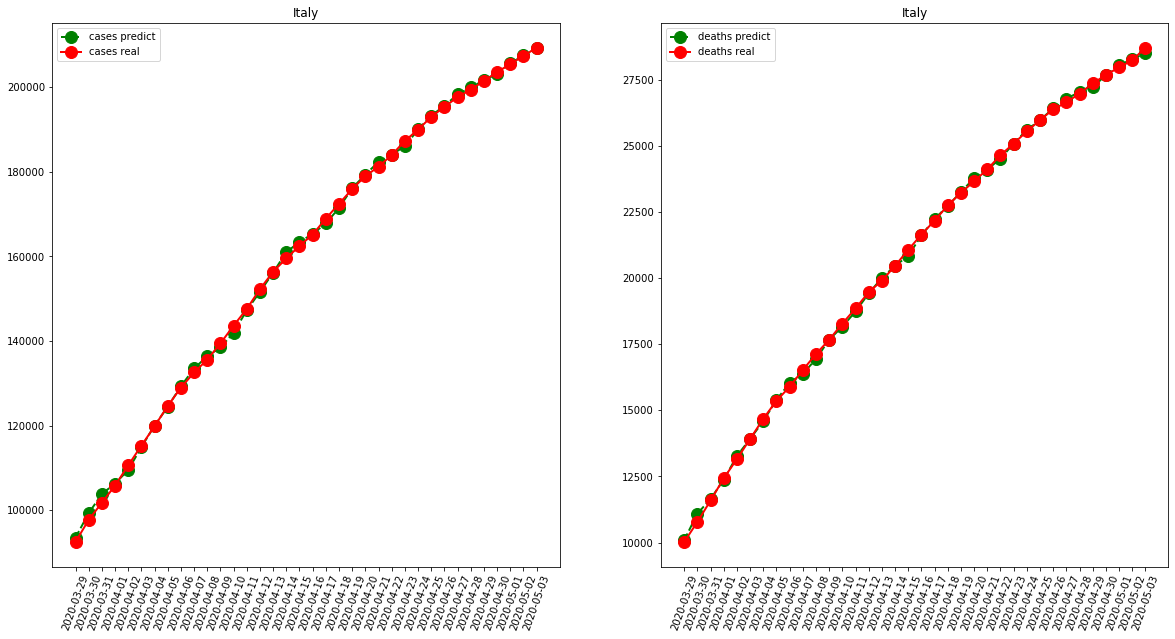

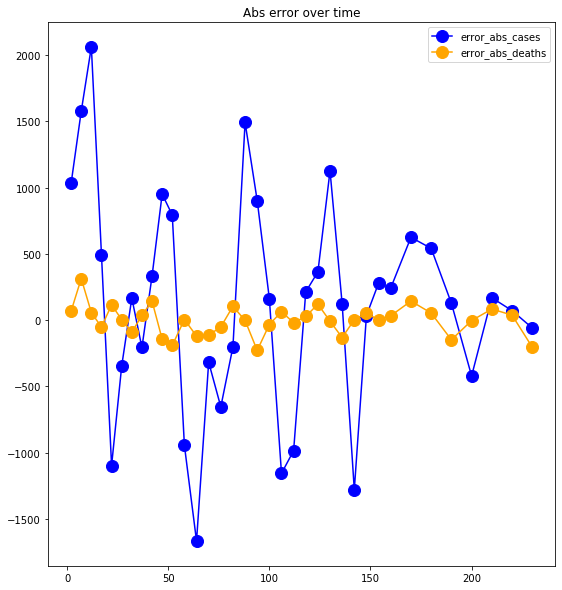

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1740.361111111111
RMSE =  3327.816255110516
-- Spain performances for deaths --
MAPE =  151.36111111111111
RMSE =  193.68022040925547


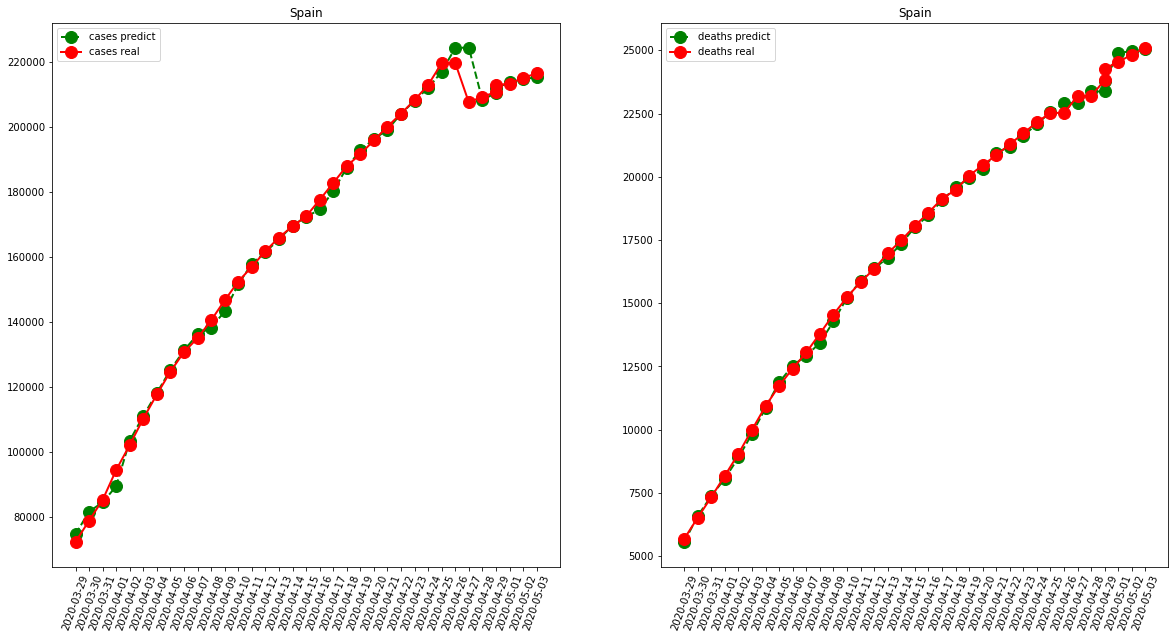

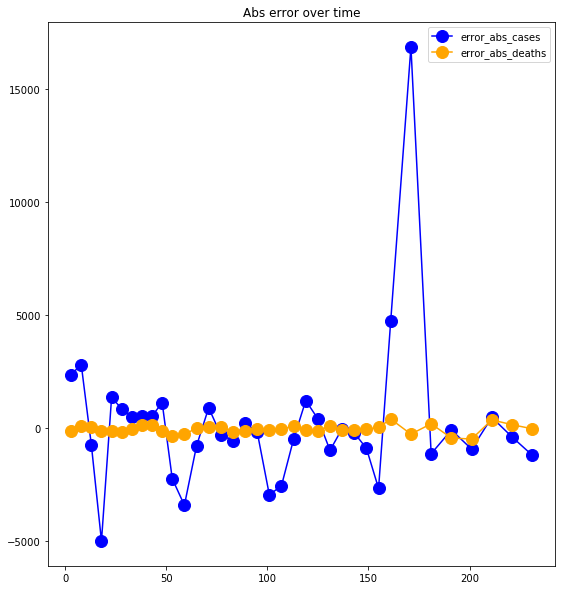

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  6028.222222222223
RMSE =  8541.108889105415
-- United States performances for deaths --
MAPE =  716.5833333333334
RMSE =  1076.413218363035


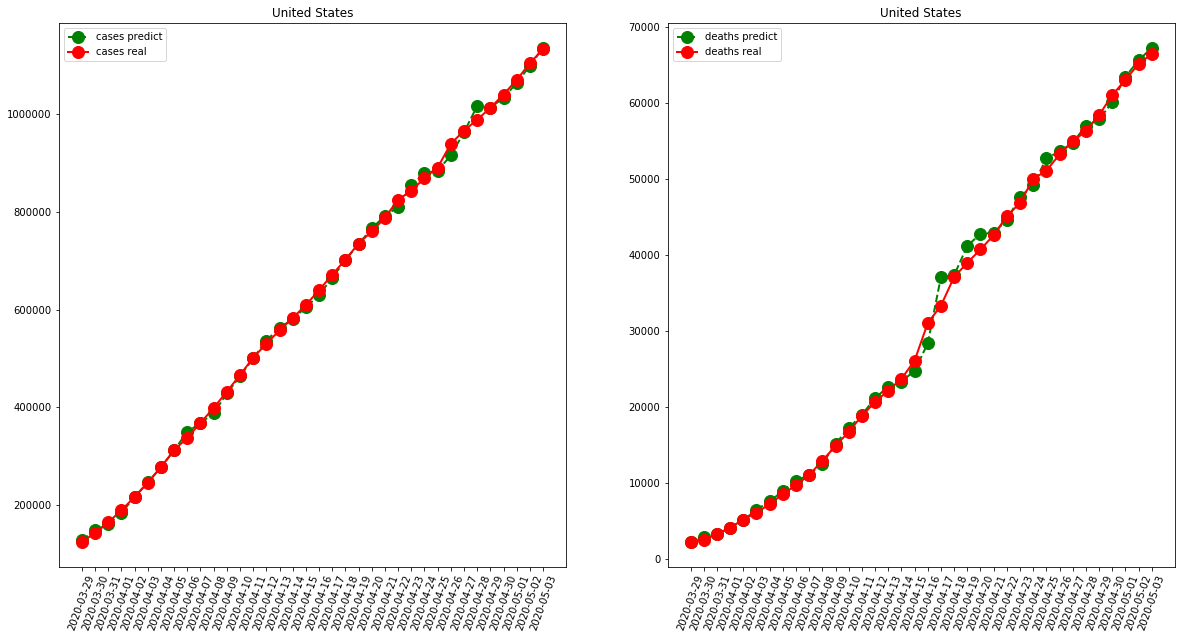

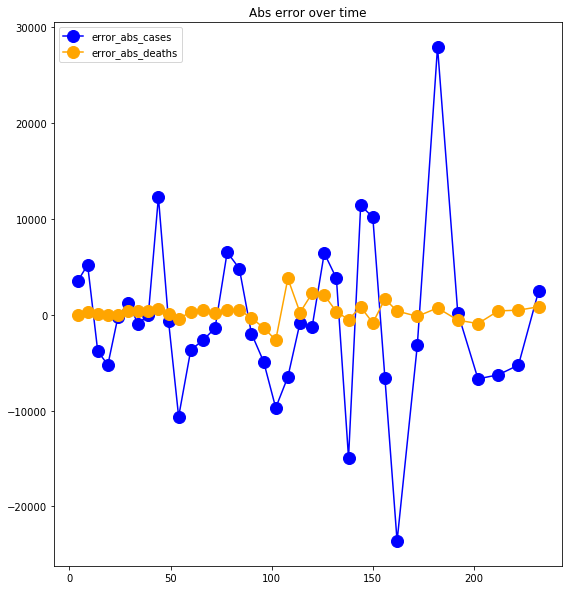

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  150.41666666666666
RMSE =  180.8915420908341
-- China performances for deaths --
MAPE =  78.69444444444444
RMSE =  260.6374131070041


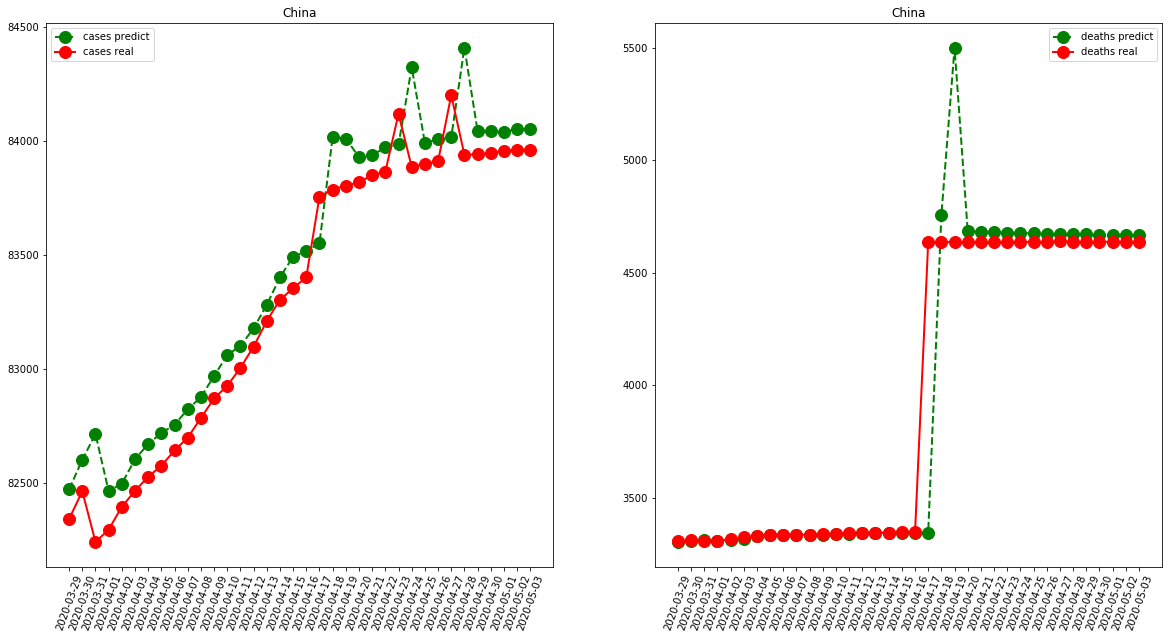

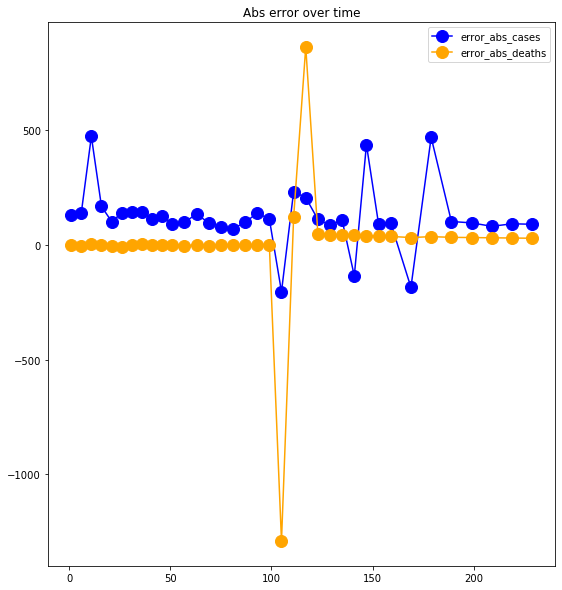

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  896.875
RMSE =  1192.8885635297204
-- United Kingdom performances for deaths --
MAPE =  935.25
RMSE =  1645.0724148194815


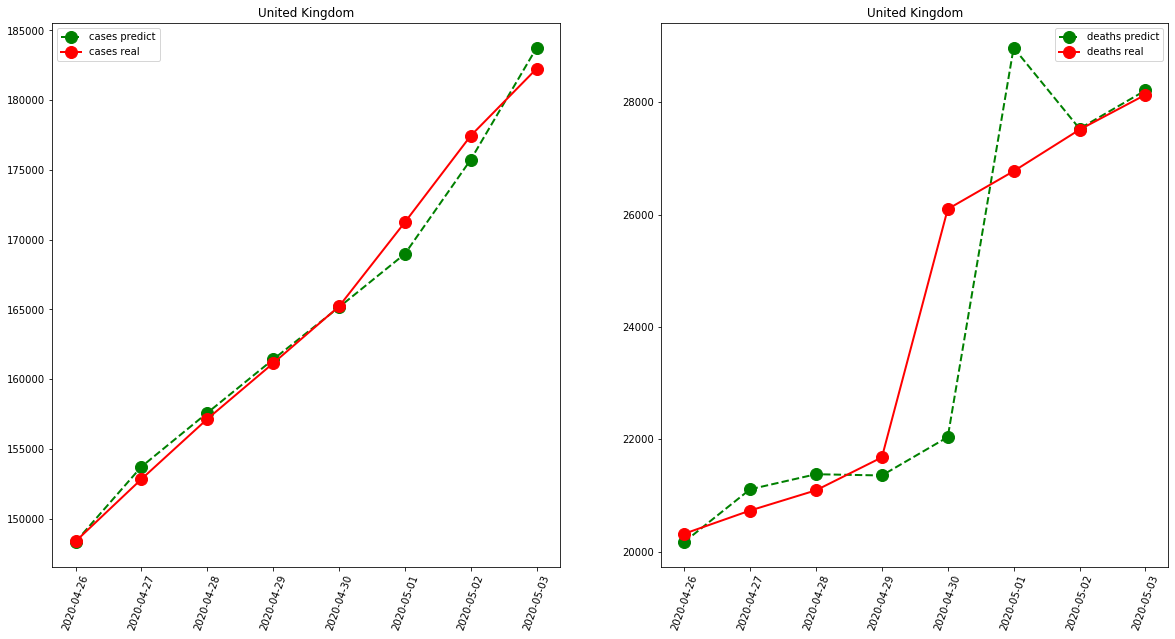

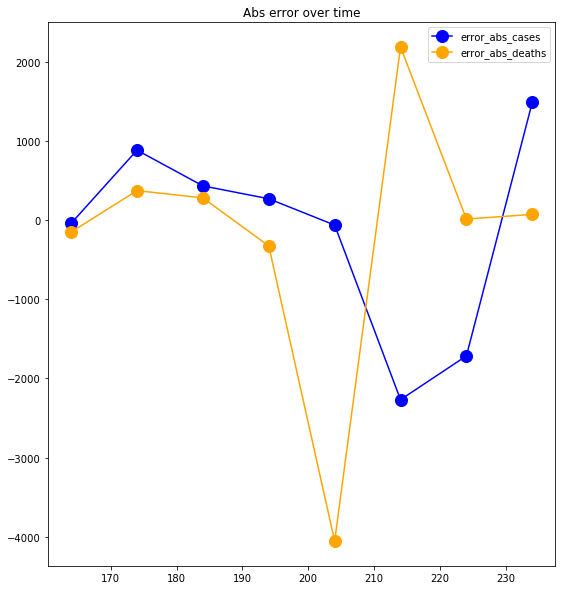

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  709.875
RMSE =  851.6792970361555
-- Germany performances for deaths --
MAPE =  72.875
RMSE =  105.47807829117859


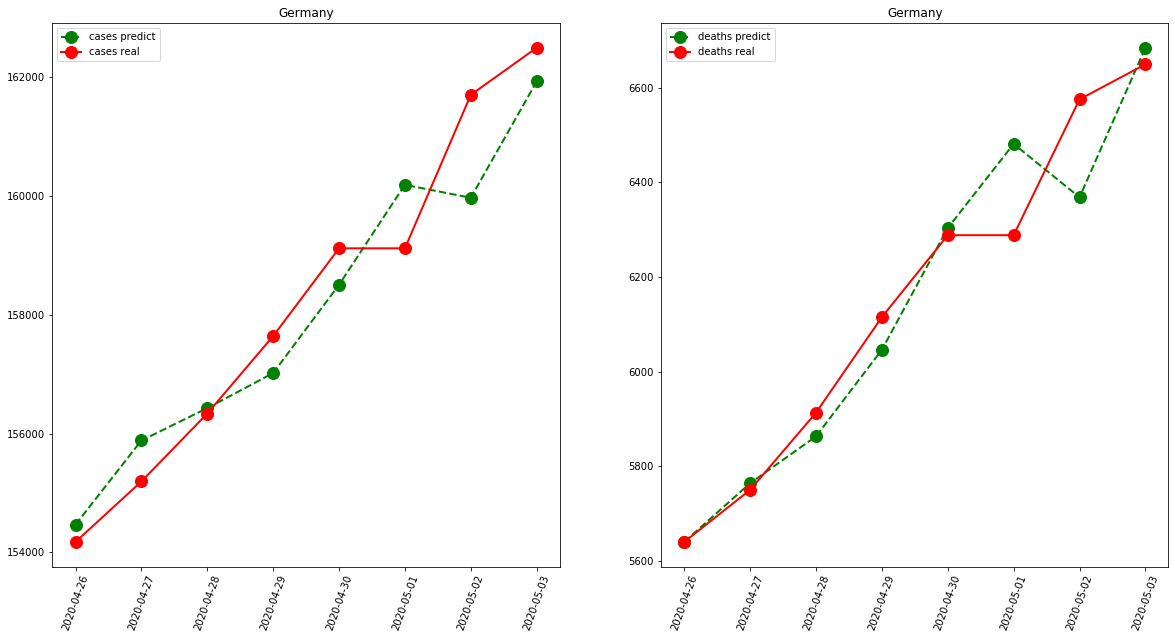

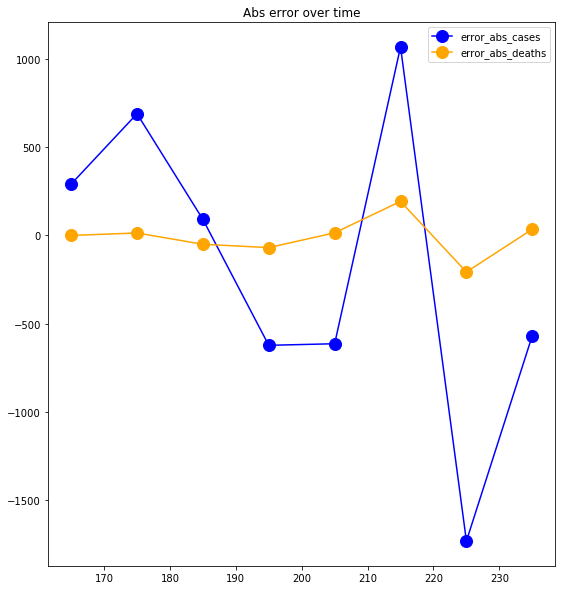

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  76.125
RMSE =  93.73033127008567
-- Iran performances for deaths --
MAPE =  14.5
RMSE =  16.73320053068151


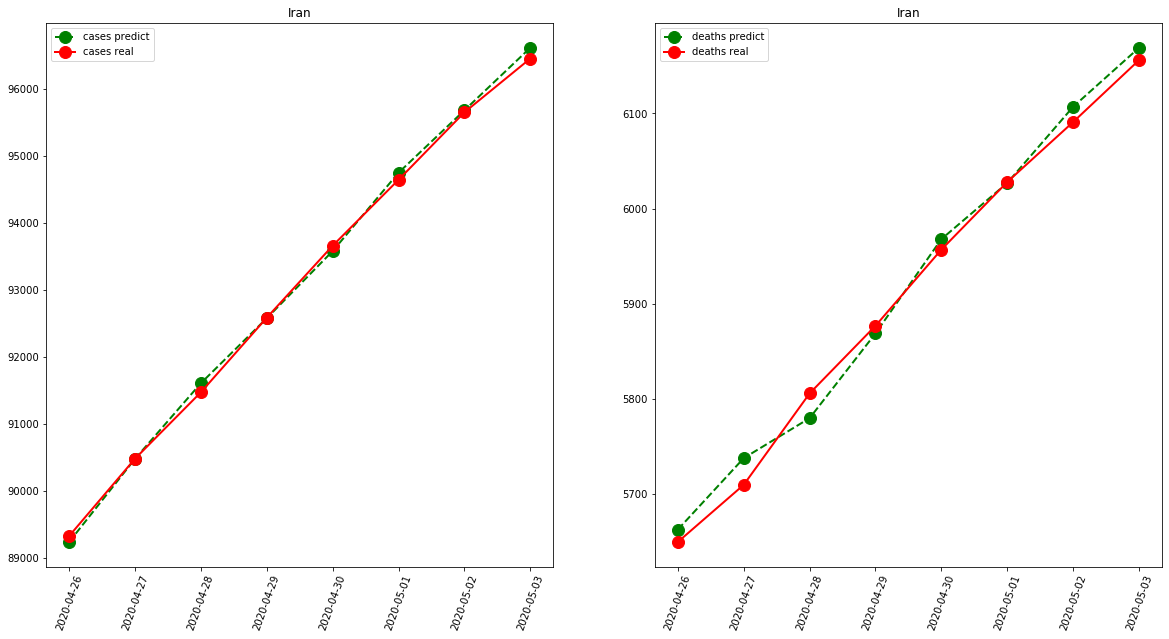

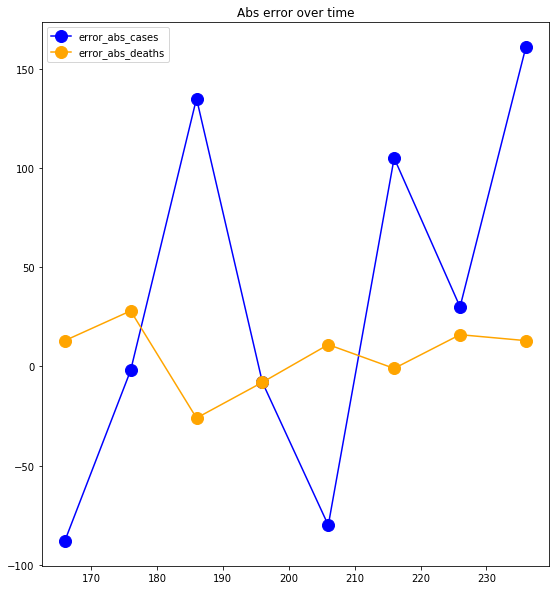

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  500.875
RMSE =  642.1821198071463
-- Turkey performances for deaths --
MAPE =  181.5
RMSE =  357.7911401921518


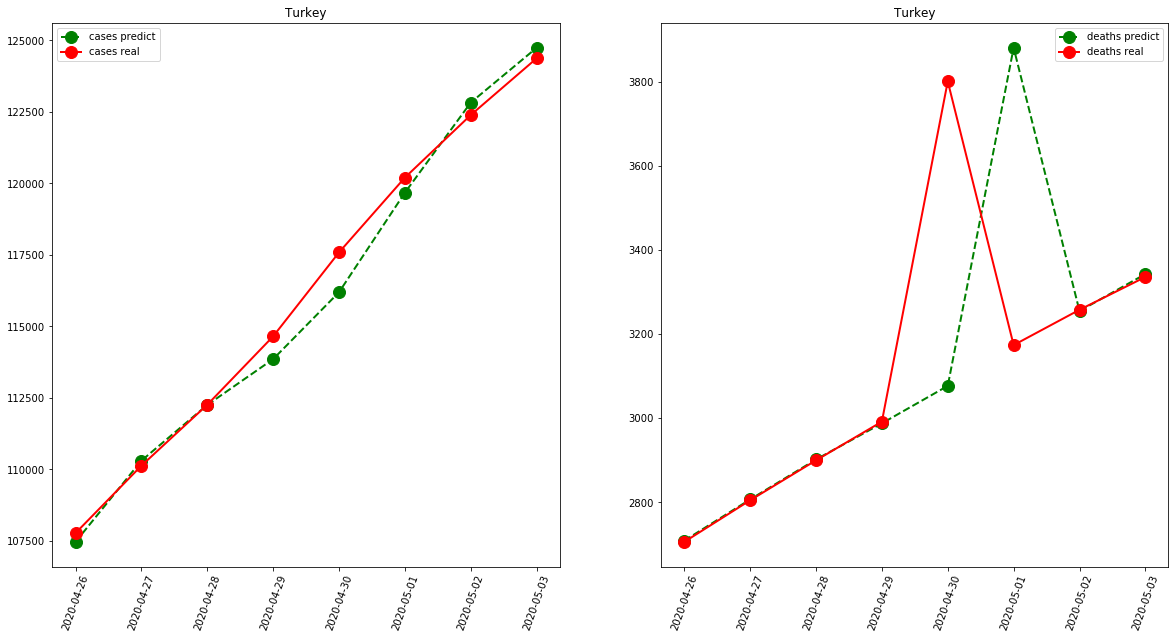

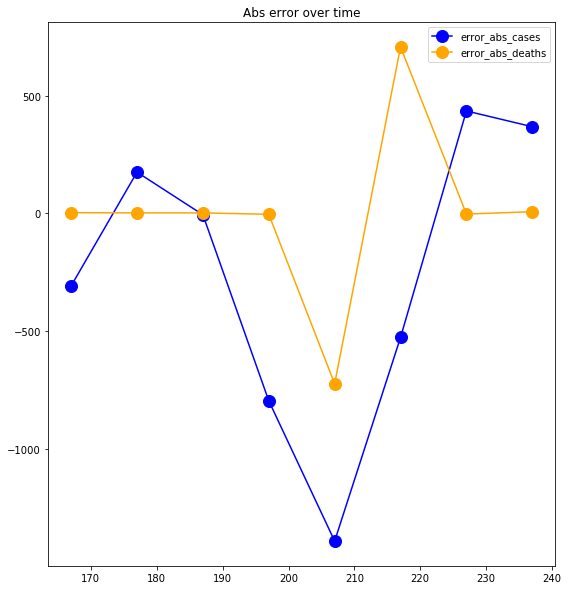

In [16]:
visShow("Turkey")

In [17]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)